In [8]:
#the modules we shall need
import numpy as np
import matplotlib.pyplot as plt
import math
import transmitter
import antenna
import reciever
import scipy as sy
import scipy.fftpack as syfp
import pylab as pyl

In [9]:
#These are constants relating to the specification of the designed speed gun
beamwidth=24 
c=2.998e8
duty_cycle= 1 #because the system transmits continously.
transmit_frequency= 10e9       #must be between 8000000000hz and 12000000000Hz
#transmit_duration =  10 		#must be the duration of seconds in which you want to transmit			#enter antenna area			#specify the antenna gain
#maximum_velocity=50		#specify the maximum speed limit in meters per second
#Range_min=    153 			# must be between 152-1608 meters
#Range_max=1607			#must be between 152-1608 meters and this are the values used to chooses the area in which targets are caputered.


In [12]:
prompt="Please insert the maximum speed limit in meters/seconds"
maximum_velocity= int(input(prompt))
prompt="Please insert the minumum range in meters. min range must be greter than 152 m "
Range_min= int(input(prompt))
prompt="Please insert the maximumrange in meters. min range must be less  than 1608 m "
Range_max=int(input(prompt)) 

Please insert the maximum speed limit in meters/seconds50
Please insert the minumum range in meters. min range must be greter than 152 m 153
Please insert the maximumrange in meters. min range must be less  than 1608 m 100


In [13]:
#range must be between 152.4 and 1609.3
if(Range_min<152):
	print("The minimum range is less than the limit")
elif(Range_min>152):
	print("The minimum range is set to: ")
	print(Range_min)
if(Range_max>1608):
	print("The range entered exists the maximum limit")
elif(Range_max<1608):
	print("The maximum range is set to: ")
	print(Range_max)

The minimum range is set to: 
153
The maximum range is set to: 
100


In [14]:
#once we have maximum speed limit we can calculate the maximum doppler frequency\
wavelength=transmitter.wavelength_calc(transmit_frequency)

fd=2*maximum_velocity/wavelength  #vehicles that have a doppler frequency above this are over speeding
print("The maximum doppler frequency allowed in Hz :")
print(fd)

period=1/transmit_frequency
np=transmit_duration/period  #the total number of pulses

The maximum doppler frequency allowed in Hz :
3335.5570380253503


In [15]:
def db_conversion(val):
	db=10*math.log(val)
	return db

In [16]:
PRF_min=c/(2*Range_min) #the prf matchin the minimum range
print("The PRF for the min Range  in Hz is :")
print(PRF_min)

PRF_max=c/(2*Range_max) #the prf matchin the minimum range
print("The PRF for the min Range  in Hz is :")
print(PRF_max)

IPP=1/transmitter.IPP(PRF_max)
pulse_length=duty_cycle*IPP
print("The inter pulse period is(in seconds): ")
print(IPP) 
linear_gain=antenna.antenna_gain(wavelength)
gain=db_conversion(linear_gain)
print("The antenna gain in Db is: ")
print(gain) #crosssections of vehicles vary between 2.7-9 meters squared and we want to see how the cross section varies with the minimum signal power



The PRF for the min Range  in Hz is :
979738.5620915033
The PRF for the min Range  in Hz is :
1499000.0
The inter pulse period is(in seconds): 
1499000.0
The antenna gain in Db is: 
26.410591084277563


In [18]:
#crosssections of vehicles vary between 2.7-9 meters squared and we want to see how the cross section varies with the minimum signal power

cross=np.linspace(1,10);
min_power= antenna.min_signal_power(transmitter.power,linear_gain,wavelength,cross,Range_max)
plt.plot(crosssection,min_power)
plt.title('minimum signal power for varying vehicle cross section')
plt.ylabel('minimum signal power')
plt.xlabel('vehicle cross sections')
plt.show()

AttributeError: 'float' object has no attribute 'linspace'

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


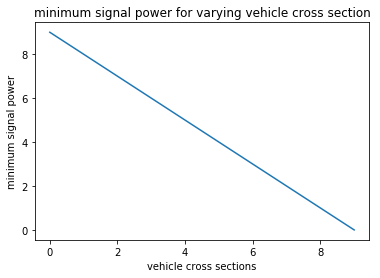

In [24]:
#crosssections of vehicles vary between 2.7-9 meters squared and we want to see how the cross section varies with the minimum signal power

#cross=np.linspace(1, 100, 1000)
cross=[]
powers=[]
for i in range(0,10):
	cross.insert(i,i)
	p=antenna.min_signal_power(transmitter.power,linear_gain,wavelength,i,Range_max)    
	powers.insert(math.floor(p),i)

#min_power= antenna.min_signal_power(transmitter.power,linear_gain,wavelength,across,Range_max)
print(cross)
print(powers)
plt.plot(cross,powers)
plt.title('minimum signal power for varying vehicle cross section')
plt.ylabel('minimum signal power')
plt.xlabel('vehicle cross sections')
plt.show()